### EDA

In [1]:
import os
os.getcwd()

'/Users/yasminezaafrani'

In [2]:
os.listdir()

['.config',
 'Music',
 '.condarc',
 'CCF.ipynb',
 'Untitled1.ipynb',
 '.DS_Store',
 '.CFUserTextEncoding',
 '.xonshrc',
 'anaconda_projects',
 '.zshrc',
 'Pictures',
 '.zprofile',
 'job_automation',
 '.zsh_history',
 'Untitled2.ipynb',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 '.cups',
 'Public',
 '.zprofileeval',
 '.tcshrc',
 '.anaconda',
 'Movies',
 '.Trash',
 '.ipynb_checkpoints',
 '.jupyter',
 'Documents',
 '.vscode',
 '.bash_profile',
 'Downloads',
 '.continuum',
 '.cache',
 '.ollama',
 '.zsh_sessions',
 '.conda']

In [3]:
import pandas as pd
df = pd.read_csv("/Users/yasminezaafrani/Downloads/creditcard.csv")

# Preview the data
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# The usual overview
df.shape        # Number of rows and columns
df.info()       # Data types and missing values
df.describe()   # Summary statistics
df.isnull().sum().sum()  # Total missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0

<Axes: title={'center': 'Class Distribution'}, xlabel='Class'>

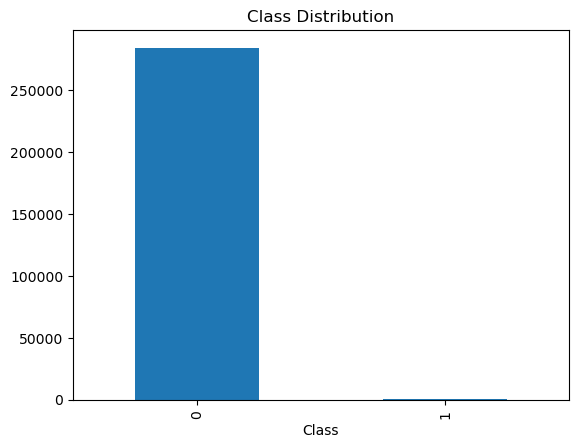

In [5]:
 # Proportion of fraud vs normal
df['Class'].value_counts(normalize=True) 
df['Class'].value_counts().plot(kind='bar', title="Class Distribution")

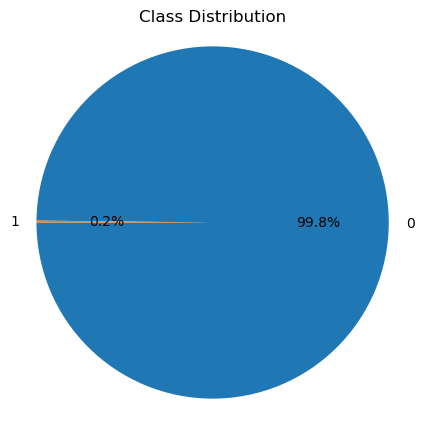

In [6]:
counts = df['Class'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Transaction Time Distribution (Hours)')

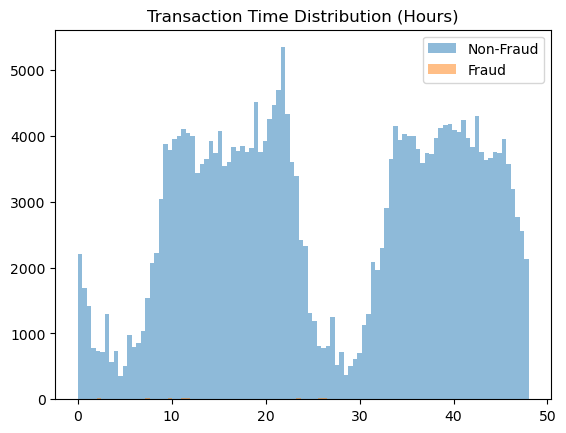

In [7]:


df['Time_Hours'] = df['Time'] / 3600
plt.hist(df[df['Class'] == 0]['Time_Hours'], bins=100, alpha=0.5, label='Non-Fraud')
plt.hist(df[df['Class'] == 1]['Time_Hours'], bins=100, alpha=0.5, label='Fraud')
plt.legend()
plt.title('Transaction Time Distribution (Hours)')

#Amount Analysis

<Axes: xlabel='Class', ylabel='Amount'>

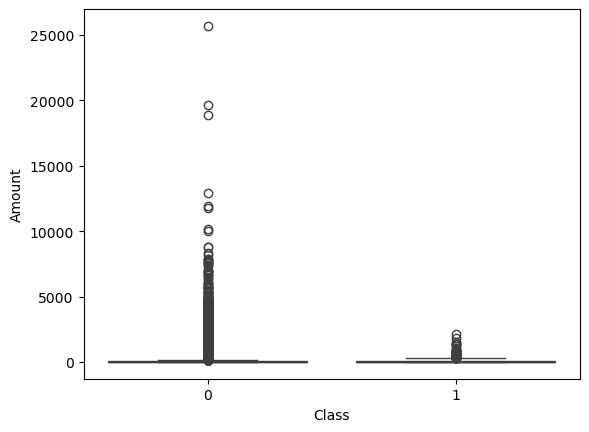

In [8]:
import seaborn as sns

sns.boxplot(x='Class', y='Amount', data=df)


<Axes: xlabel='Amount', ylabel='Density'>

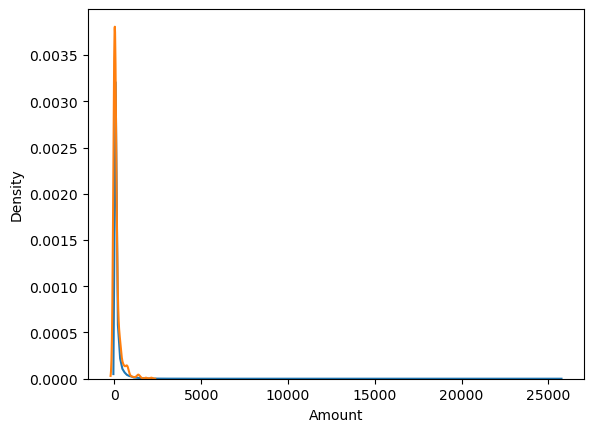

In [9]:
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraud')
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud')

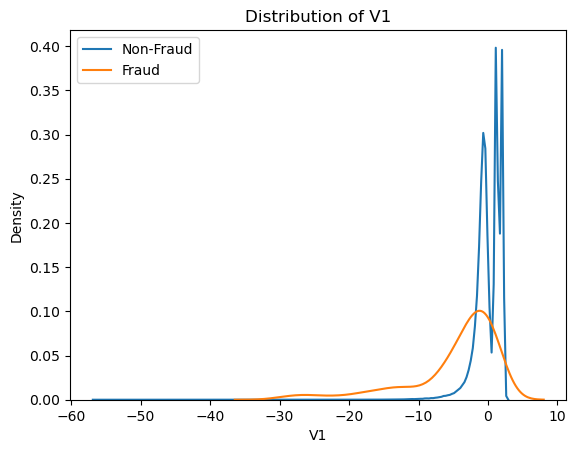

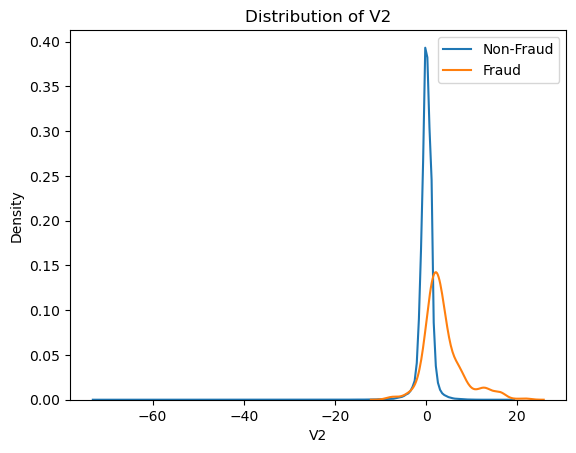

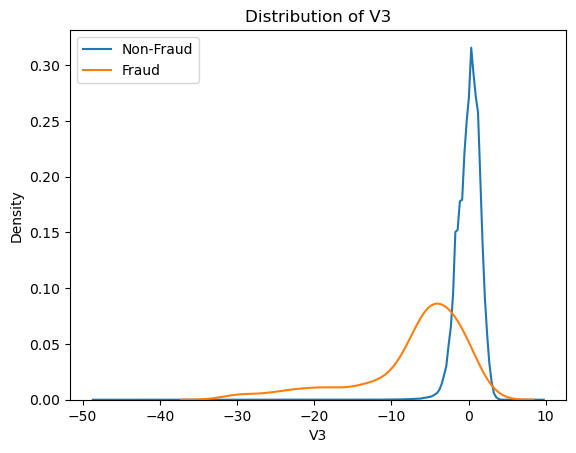

In [10]:
import matplotlib.pyplot as plt

for col in ['V1', 'V2', 'V3']:
    sns.kdeplot(df[df['Class'] == 0][col], label='Non-Fraud')
    sns.kdeplot(df[df['Class'] == 1][col], label='Fraud')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

<Axes: >

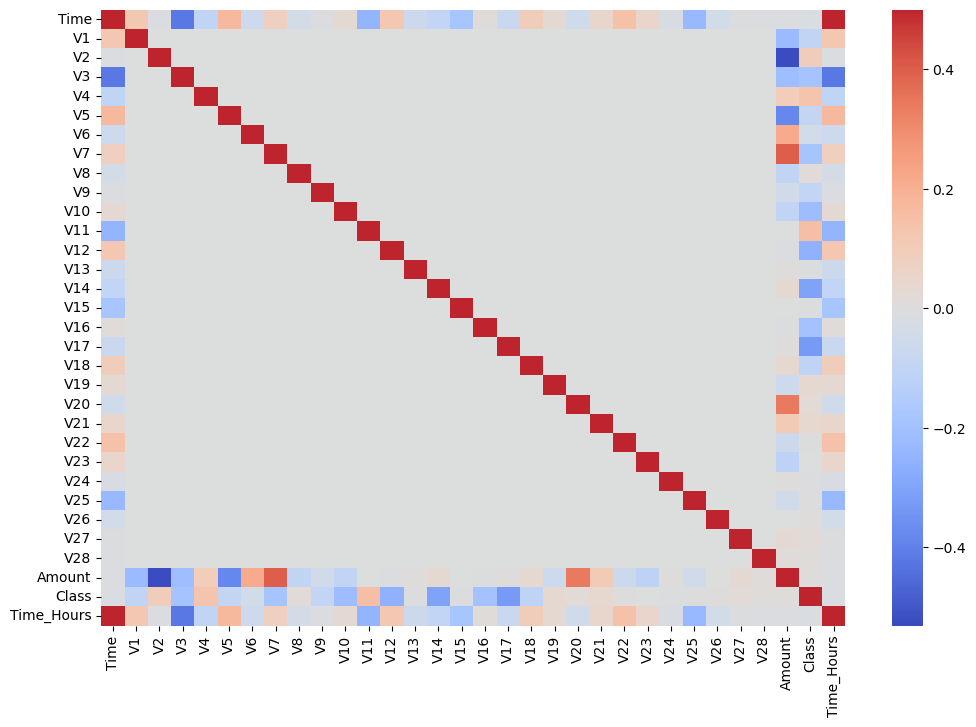

In [11]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', vmax=0.5, center=0)


In [12]:
df.groupby('Class').mean()
df.groupby('Class').median()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hours
Class,,,,,,,,,,,,,,,,,,,,,
0,84711.0,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.00,23.530833
1,75568.5,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.25,20.991250


In [13]:
# Check skewness for 'Amount' and some PCA features
df['Amount'].skew()
df['V14'].skew()


-1.9951758402683304

/var/folders/z8/8fw__96j59n8d8mzz7zjt5mw0000gn/T/ipykernel_60778/393225872.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['V14'], shade=True)


<Axes: xlabel='V14', ylabel='Density'>

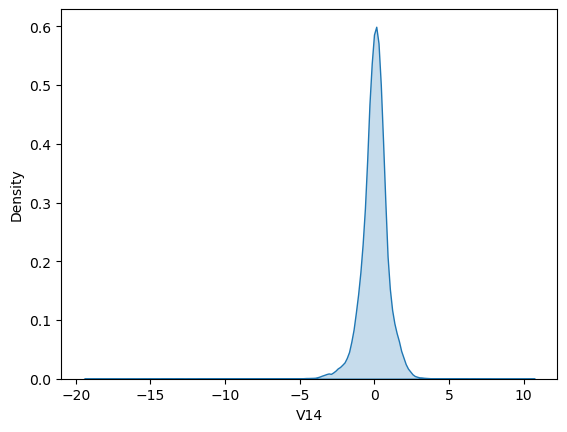

In [14]:
sns.kdeplot(df['V14'], shade=True)  


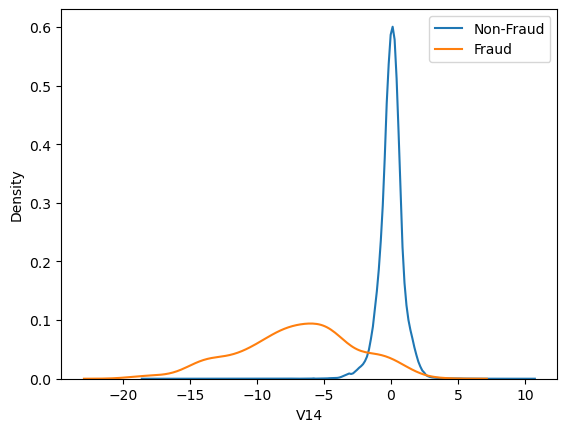

In [15]:
sns.kdeplot(df[df['Class'] == 0]['V14'], label='Non-Fraud')
sns.kdeplot(df[df['Class'] == 1]['V14'], label='Fraud')
plt.legend()


V14 has a strong negative skew (as seen from the skewness = -1.995) 
=> Frauds tend to occur when this value is very low.

This is highly discriminative:
When V14 < -5, the probability of fraud is mu

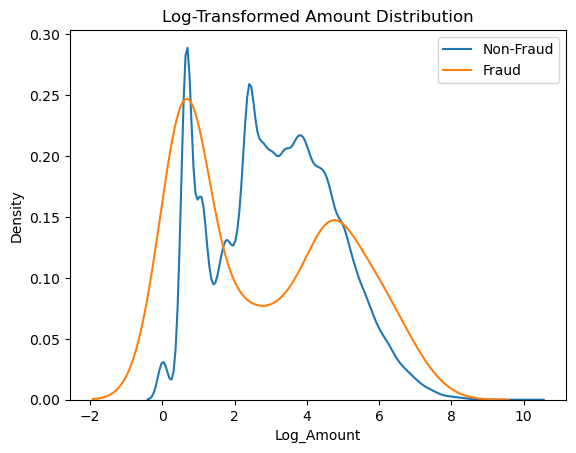

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['Log_Amount'] = np.log1p(df['Amount'])  # log(1 + x)

sns.kdeplot(df[df['Class'] == 0]['Log_Amount'], label='Non-Fraud')
sns.kdeplot(df[df['Class'] == 1]['Log_Amount'], label='Fraud')
plt.title("Log-Transformed Amount Distribution")
plt.legend()
plt.show()


### Preprocessing

In [17]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600) % 24)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Amount_Scaled', 'Hour_Scaled']] = scaler.fit_transform(df[['Amount', 'Hour']])


In [19]:
# Drop columns we don't want to feed to the model
X = df.drop(columns=['Time', 'Amount', 'Hour', 'Class'])  # keep scaled versions
y = df['Class']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


###SMOTE

In [21]:
!pip install imbalanced-learn


In [22]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class balance
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# 1. Initialize the model with class weights handled via SMOTE
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Fit to balanced training data
logreg.fit(X_train_smote, y_train_smote)

# 3. Predict on original (imbalanced) test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # probability of fraud

# 4. Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nAUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[55305  1559]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9726    0.9860     56864
           1     0.0546    0.9184    0.1030        98

    accuracy                         0.9725     56962
   macro avg     0.5272    0.9455    0.5445     56962
weighted avg     0.9982    0.9725    0.9845     56962


AUC Score: 0.9723868549952338


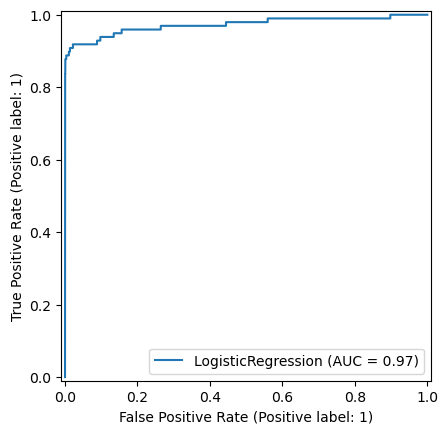

In [24]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg, X_test, y_test)


### Precision-Recall Curve

#### Better than ROC when dealing with imbalanced data
#### Shows tradeoff between:
        Precision = fewer false alarms
        Recall = catching more frauds

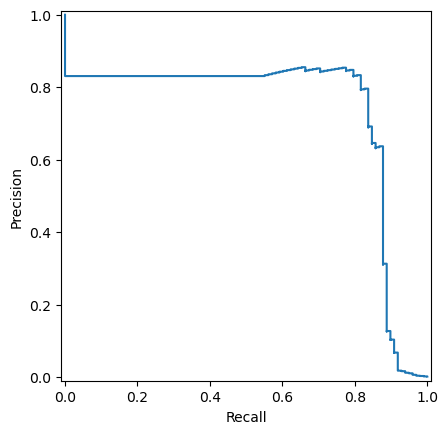

In [25]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Get predicted probabilities
y_scores = logreg.predict_proba(X_test)[:, 1]

# Compute curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


RandomForestClassifier then xgboost

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))
print("AUC:", roc_auc_score(y_test, y_prob_rf))


[[56853    11]
 [   18    80]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8791    0.8163    0.8466        98

    accuracy                         0.9995     56962
   macro avg     0.9394    0.9081    0.9232     56962
weighted avg     0.9995    0.9995    0.9995     56962

AUC: 0.9685551204162026


In [27]:
!pip install xgboost


In [28]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

# Fit to SMOTE-balanced training data
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on real test set
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nAUC Score:", roc_auc_score(y_test, y_prob))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[56838    26]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7615    0.8469    0.8019        98

    accuracy                         0.9993     56962
   macro avg     0.8806    0.9232    0.9008     56962
weighted avg     0.9993    0.9993    0.9993     56962


AUC Score: 0.9855353051462565


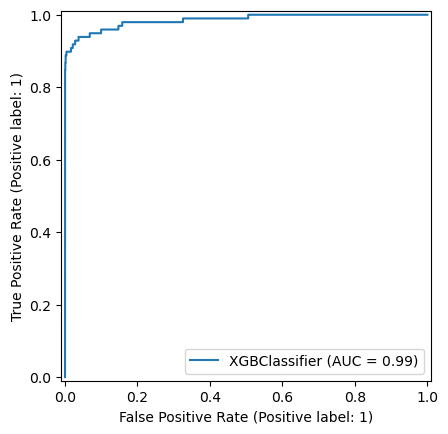

In [29]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)


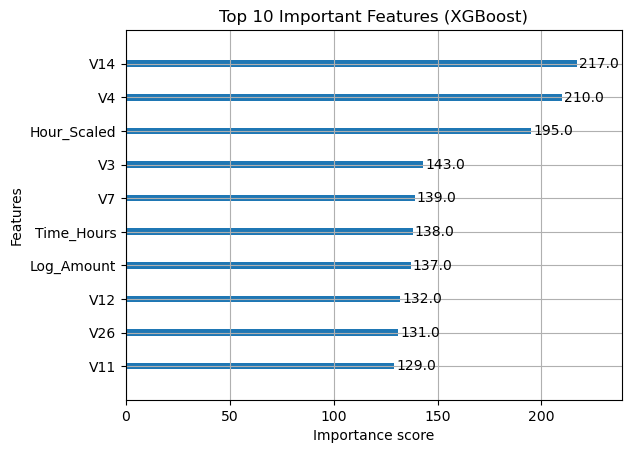

In [30]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

In [31]:
!pip install shap

In [32]:
import shap

# Use the model you trained earlier
explainer = shap.Explainer(xgb_model)

# Explain a subset of your test data (we use a sample for performance)
shap_values = explainer(X_test[:1000])


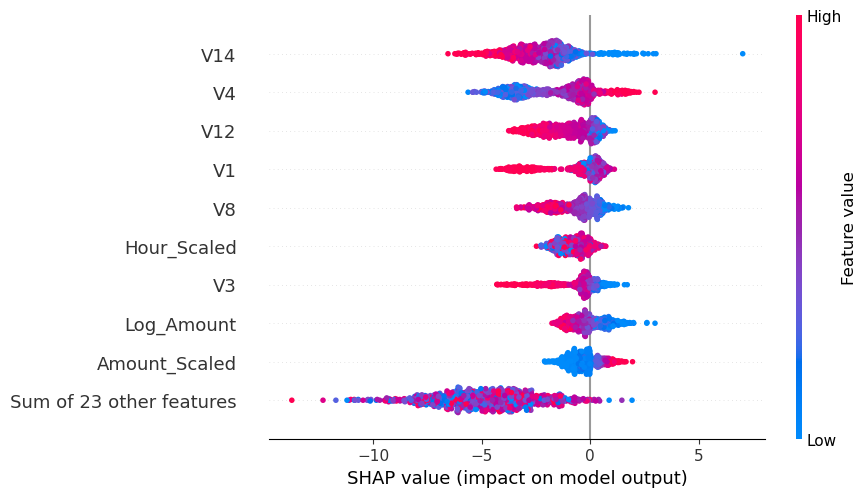

In [33]:
shap.plots.beeswarm(shap_values)


The model’s base value (expected value) is ~ -0.263, which corresponds to the average output of the model before any feature contributions.

The model output for this specific prediction is f(x) = -12.257, which is a very strong prediction toward class 0 (non-fraud).

🔵 Blue bars = features pushing toward non-fraud
🔴 Red bars = features pushing toward fraud

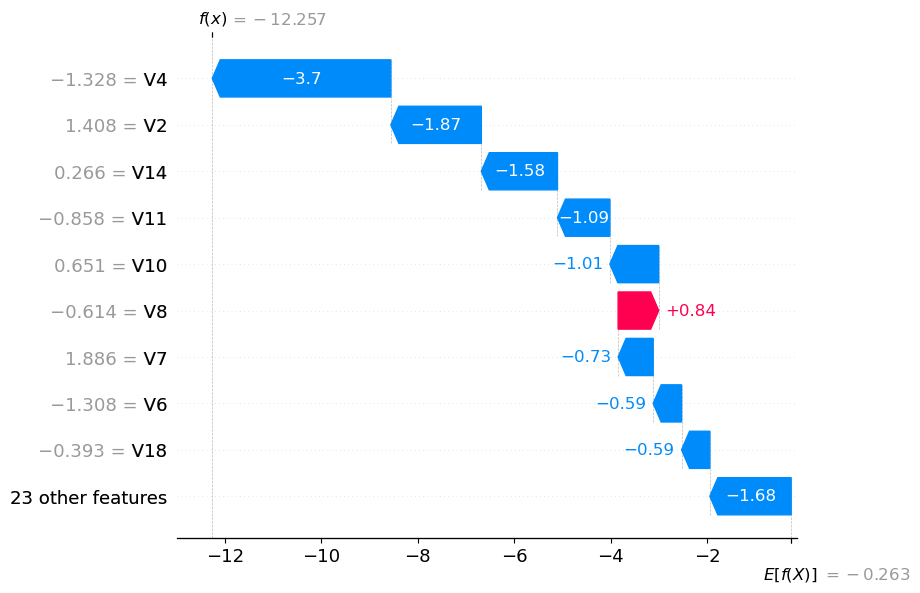

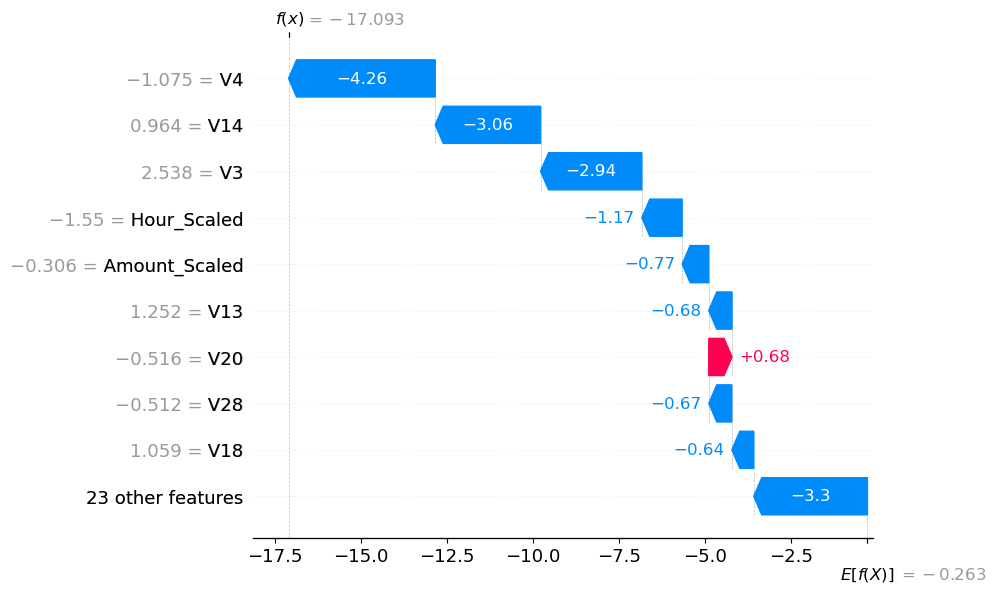

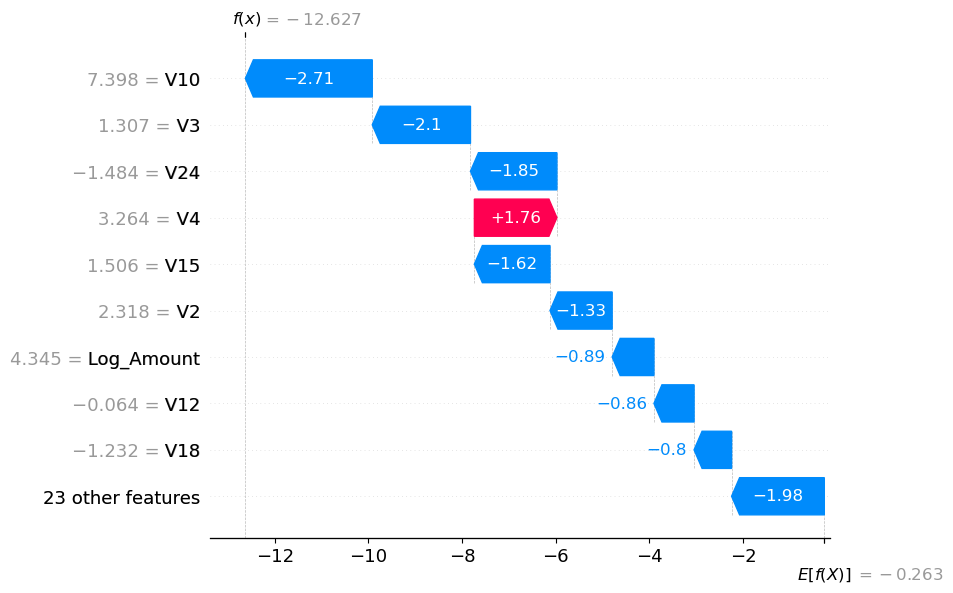

In [34]:
for i in range(3):
    shap.plots.waterfall(shap_values[i])


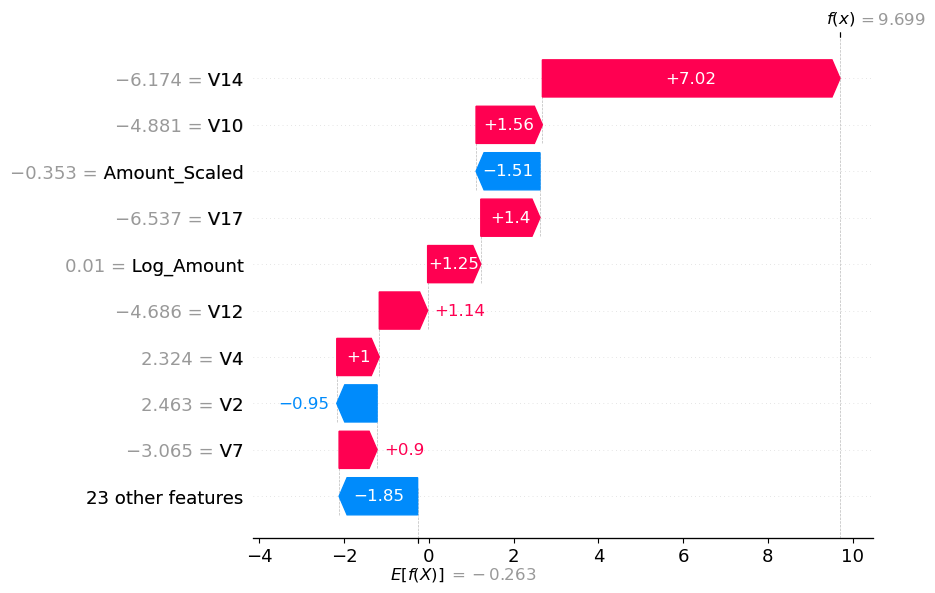

In [35]:
fraud_indices = y_test[y_test == 1].index
# Find first fraud index within the first 1000 rows
for i, idx in enumerate(X_test[:1000].index):
    if idx in fraud_indices:
        fraud_pos = i
        break

# Plot
shap.plots.waterfall(shap_values[fraud_pos])



This transaction is flagged as fraud mainly due to V14, V10, and V17 — all deeply negative and historically linked to fraud cases. The amount was low, but other red flags strongly outweigh it.”

The fraud signal in V14 is extremely consistent — we could even build a simple rule-based flag: 
if V14 < -5 → high fraud risk

In [36]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train only on legitimate transactions
X_train_anomaly = X[y == 0]

# Initialize Isolation Forest
iso_model = IsolationForest(contamination=0.001, random_state=42)
iso_model.fit(X_train_anomaly)

# Predict on test set (−1 = anomaly, 1 = normal)
y_pred_iso = iso_model.predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]  # Convert to fraud = 1, non-fraud = 0

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_iso))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_iso, digits=4))

# Optional: AUC score (requires predicted anomaly score)
y_score_iso = -iso_model.decision_function(X_test)
print("AUC Score:", roc_auc_score(y_test, y_score_iso))


Confusion Matrix:
[[56806    58]
 [   73    25]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9990    0.9988     56864
           1     0.3012    0.2551    0.2762        98

    accuracy                         0.9977     56962
   macro avg     0.6500    0.6270    0.6375     56962
weighted avg     0.9975    0.9977    0.9976     56962

AUC Score: 0.955331661364602


Indicates that the model does a decent job ranking anomalies, even if raw predictions are conservative

In [37]:
import pandas as pd

# Fill in actual values based on your outputs
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "Isolation Forest"],
    "Recall":    [0.9184, 0.8673, 0.8469, 0.2551],
    "Precision": [0.0546, 0.0785, 0.7615, 0.3012],
    "F1-score":  [0.1030, 0.1442, 0.8019, 0.2762],
    "AUC":       [0.9724, 0.9731, 0.9855, 0.9553]
})

# Display sorted by F1 or Recall
model_comparison.sort_values(by="F1-score", ascending=False)


,Model,Recall,Precision,F1-score,AUC
2,XGBoost,0.8469,0.7615,0.8019,0.9855
3,Isolation Forest,0.2551,0.3012,0.2762,0.9553
1,Random Forest,0.8673,0.0785,0.1442,0.9731
0,Logistic Regression,0.9184,0.0546,0.1030,0.9724


## 📌 Conclusion

This project aimed to detect fraudulent credit card transactions using a variety of supervised and unsupervised models. Here’s what we observed:

### 🔍 Summary of Findings:

- **XGBoost** provided the best balance of performance metrics:
  - **F1-score: 80.2%**
  - **Precision: 76.2%**
  - **Recall: 84.7%**
  - **AUC: 98.6%**
  > This makes it the most robust and production-ready model for real-world fraud detection.

- **Logistic Regression** achieved the **highest recall (91.8%)**, meaning it caught nearly all fraud cases, but its **very low precision (5.5%)** makes it prone to false alarms. It’s a solid **benchmark model**, but not ideal for deployment unless paired with human review.

- **Random Forest** performed decently but still lacked the precision and F1 of XGBoost.

- **Isolation Forest** (anomaly detection) was helpful in identifying novel patterns in fraud without using labels, but its **recall (25.5%)** and **precision (30.1%)** are too low for primary deployment. It is best suited as a **complementary detector** or early warning system.

